# Apprentissage statistique : Classification

### Importation des packages

In [1]:
import csv
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
from sklearn import preprocessing
from sklearn import metrics
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from sklearn.metrics import roc_curve, auc
import statsmodels.api as sm
import seaborn as sns
from scipy import *
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
from tkinter import*
from tkinter import filedialog

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [3]:
# Permet à l'utilisateur de choisir un fichier
root = Tk()
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
input1 = filedialog.askopenfilename()
%gui tk

input2 = input("Indiquez la manière dont sont séparées vos variables (tabulation/espace/;) : ")   # ici espace
# Passage en minuscule si l'utilisateur écrit en majuscule
input2 = input2.lower() ;
# Tant que l'utilisateur n'a pas rentré quelque chose de correct
while not (input2 == 'tabulation' or input2 == 'espace' or input2 == ';') :
    input2 = input("Veuillez entrer tabulation, espace ou ; : ")
    input2 = input2.lower()

# On met les vrais caractères pour pouvoir importer le fichier
if input2 == 'tabulation' :
    input2 = '\t'
elif input2 == 'espace' :
    input2 = ' '

# Importation du fichier
file = open(input1, "r")
dataset = pd.read_csv(file, sep=input2)

# Récupération du noms des différentes variables
title = list(dataset.columns)

# Variable d'intérêt
reponse = input("Indiquez le nom de la variable d'intérêt : ")   # ici : y
while (reponse not in title) :
    reponse = input("Cette variable n'existe pas ! Veuillez vérifier son nom et essayer à nouveau : ")
    
# Vérifier s'il y a une variable identifiant
input3 = input("Vos données ont-elles une variable identifiant pour les individus ? (y/n) : ")     # ici : n
# Passage en minuscule si l'utilisateur rentre Y ou N
input3 = input3.lower() ;
# Tant que l'utilisateur n'a pas rentré quelque chose de correct
while not (input3 == 'y' or input3 == 'n') :
    input3 = input("Veuillez entrer y ou n : ")
    input3 = input3.lower()
# S'il y en a une
if input3 == 'y' :
    input4 = input("Indiquez le nom de la variable identifiant : ")
    while input4 not in title or input4 == reponse :
        if input4 not in title :
            input4 = input("Cette variable n'existe pas ! Veuillez vérifier son nom et essayer à nouveau : ")
        elif input4 == reponse :
            input4 = input("Il s'agit de la variable d'intérêt ! Veuillez vérifier et essayer à nouveau : ")
    # On supprime cette variable
    dataset = dataset.drop(input4, 1)

# Suppression des instances ayant des données manquantes
dataset = dataset.dropna(how = 'any')

# Forme des résultats
input6 = input("Choisissez la forme sous laquelle vous voulez les résultats (erreur test/matrice de confusion/courbe ROC) : ")
# Passage en minuscule si l'utilisateur écrit en majuscule
input6 = input6.lower() ;
# Tant que l'utilisateur n'a pas rentré quelque chose de correct
while not (input6 == 'erreur test' or input6 == 'matrice de confusion' or input6 == 'courbe roc') :
    input6 = input("Veuillez entrer erreur test, matrice de confusion ou courbe ROC : ")
    input6 = input6.lower()
    
# Nombre total d'instances
total_rows = len(dataset)
# Nombre total de variables
total_columns = len(list(dataset))

Indiquez la manière dont sont séparées vos variables (tabulation/espace/;) : ;
Indiquez le nom de la variable d'intérêt : type
Vos données ont-elles une variable identifiant pour les individus ? (y/n) : y
Indiquez le nom de la variable identifiant : id
Choisissez la forme sous laquelle vous voulez les résultats (erreur test/matrice de confusion/courbe ROC) : courbe roc


In [4]:
dataset.head()

,make,address,all,num3d,our,over,remove,internet,order,mail,...,charSemicolon,charRoundbracket,charSquarebracket,charExclamation,charDollar,charHash,capitalAve,capitalLong,capitalTotal,type
0,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,3.000,16,33,spam
1,0.00,0.00,0.00,0.0,0.00,0.00,0.00,1.12,0.00,0.00,...,0.0,0.204,0.0,0.408,0.408,0.000,4.100,25,82,spam
2,0.00,0.00,0.48,0.0,0.48,0.00,0.00,0.48,0.00,0.00,...,0.0,0.084,0.0,0.084,0.761,0.000,5.322,46,165,spam
3,0.08,0.08,0.76,0.0,0.85,1.02,0.25,0.17,0.59,0.08,...,0.0,0.063,0.0,0.394,0.114,0.012,7.540,669,1410,spam
4,0.00,0.00,0.19,0.0,0.19,0.00,0.00,0.19,0.19,0.19,...,0.0,0.058,0.0,0.264,0.000,0.000,4.053,93,381,spam


In [5]:
y = dataset[reponse]
y_values = list(y)

Dimension de votre dataset

In [6]:
print(dataset.shape)

(500, 58)


Visualisation du résumé de la variable d'intérêt

In [7]:
y.describe()
classe = list(set(y))
nb_classe =  len(list(set(y))) # Taille de la liste contenant la variable d'intérêt sans doublon

print("Différentes classes de la variable d'intérêt : ", classe)
print("Nombre de classes : ", nb_classe)

Différentes classes de la variable d'intérêt :  ['nonspam', 'spam']
Nombre de classes :  2


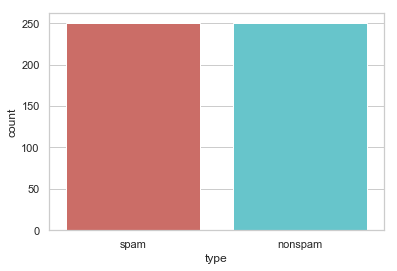

In [8]:
sns.countplot(x = reponse, data = dataset, palette = 'hls')
plt.show()

In [9]:
# Division du dataset
xTrain, xTest = train_test_split(dataset, train_size=int(total_rows*(2/3)), test_size=int(total_rows*(1/3)))
# Vérifications
print("Dimension du dataset d'apprentissage : " + str(xTrain.shape))
print("Dimension du dataset de test : " + str(xTest.shape))

Dimension du dataset d'apprentissage : (333, 58)
Dimension du dataset de test : (166, 58)


In [10]:
# Récupération des variables explicatives du dataset apprentissage et du dataset test
XTrain = xTrain.iloc[:,:total_columns-1]
XTest = xTest.iloc[:,:total_columns-1]
# Vérification
print("Dataset d'apprentissage : \n")
print(XTrain.shape)
print(XTrain.head())

print("\nDataset test : \n")
print(XTest.shape)
print(XTest.head())

Dataset d'apprentissage : 

(333, 57)
     make  address   all  num3d   our  over  remove  internet  order  mail  \
153   0.0     0.00  0.00    0.0  0.89   0.0    0.00      0.00    0.0  0.00   
47    0.0     1.47  0.00    0.0  0.00   0.0    0.00      0.00    0.0  1.47   
202   0.0     0.00  0.71    0.0  0.71   0.0    0.00      0.00    0.0  0.00   
354   0.0     0.00  0.00    0.0  0.00   0.0    0.00      0.00    0.0  0.00   
239   0.0     0.53  0.53    0.0  0.80   0.0    0.26      0.26    0.0  0.26   

         ...       conference  charSemicolon  charRoundbracket  \
153      ...              0.0            0.0             0.121   
47       ...              0.0            0.0             0.000   
202      ...              0.0            0.0             0.000   
354      ...              0.0            0.0             0.412   
239      ...              0.0            0.0             0.000   

     charSquarebracket  charExclamation  charDollar  charHash  capitalAve  \
153              0.

In [11]:
# Isolation de la variable d'intérêt
yTrain = xTrain.iloc[:,total_columns-1]
yTrain_values = list(yTrain)

yTest = xTest.iloc[:,total_columns-1]
yTest_values = list(yTest)

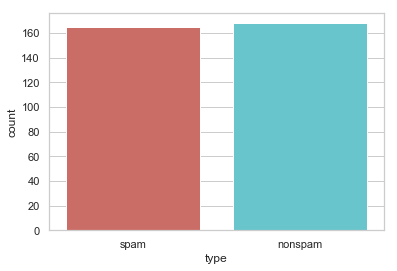

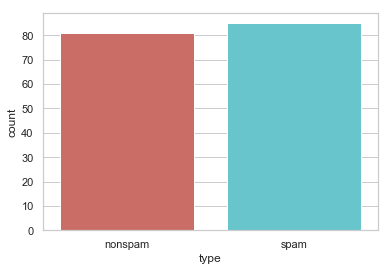

spam       85
nonspam    81
Name: type, dtype: int64

In [12]:
# Vérification que les classes soient bien réparties dans les 2 datasets

# Dataset apprentissage
    # /!\ Représentation graphique ou juste afficher nb_occ, je sais pas
sns.countplot(x = reponse, data = xTrain, palette = 'hls')
plt.show()
xTrain[reponse].value_counts()

# Dataset test
sns.countplot(x = reponse, data = xTest, palette = 'hls')
plt.show()
xTest[reponse].value_counts()

In [13]:
# Regression logistique
# Construction d'un objet permettant de réaliser une régression logistique
logit_model=linear_model.LogisticRegression()
logit_model.fit(XTrain,yTrain)
pred_rl = logit_model.predict(XTest)

# Performance du modèle
score_glm = logit_model.score(XTest, yTest)

In [14]:
# Random Forest
# Traitement des données.
# S'il s'agit de str pour la variable d'intérêt, il faut la convertir en int pour appliquer RandomForestClassifier
yTrain_ = [0]*len(yTrain_values)
for i in range(nb_classe):
    for j in range(len(yTrain_values)):
        if(yTrain_values[j]==classe[i]):
            yTrain_[j]=i
            
yTest_ = [0]*len(yTest_values)
for i in range(nb_classe):
    for j in range(len(yTest_values)):
        if(yTest_values[j]==classe[i]):
            yTest_[j]=i
            
rf_model = RandomForestClassifier()

# Etablissement des différents paramètres à tester
parameter_grid = {'n_estimators': [10, 25, 50, 100],
                  'criterion': ['gini', 'entropy'],
                  'max_features': [1, 2, 3, 4]}

# Cross Validation (on fait tourner 10 fois le modele sur differents découpage)
cross_validation = StratifiedKFold(n_splits=10)

# Sélection des meilleurs paramètres
grid_search = GridSearchCV(rf_model,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(XTrain, yTrain_)

# Visualisation des meilleurs paramètres
print('Best parameters: {}'.format(grid_search.best_params_))

# Stockage des meilleurs paramètres
nestim_best = grid_search.best_params_['n_estimators']
criterion_best = grid_search.best_params_['criterion']
max_features_best = grid_search.best_params_['max_features']

# Mise en place du modèle avec les meilleurs paramètres
rf_model = RandomForestClassifier(n_estimators = nestim_best, criterion = criterion_best, max_features = max_features_best)
rf_model.fit(XTrain, yTrain_)
pred_rf = list(rf_model.predict(XTest))
pred_rf = np.array(pred_rf).reshape(-1,1)
yTest_ = np.array(yTest_).reshape(-1,1)

# Importance des variables - 0 quand elle n'apparaît pas dans l’arbre
display_imp = input("Souhaitez vous afficher l'importance de chaque variable pour Random Forest ? (y/n) : ")
if display_imp == 'y' :
    # Importance des variables - 0 quand elle n'apparaît pas dans l’arbre
    features = dataset.drop(reponse, axis = 1)
    feature_list = list(features.columns)
    # On récupère l'importance des variables
    importances = list(rf_model.feature_importances_)
    # Liste des tuples variable - importance
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
    # Afficher les variables par ordre d'importance
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Affichage des tuples par ordre décroissant 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Performance du modèle
score_rf = np.sum(pred_rf==yTest_)/len(pred_rf)

Best parameters: {'criterion': 'gini', 'max_features': 2, 'n_estimators': 100}
Souhaitez vous afficher l'importance de chaque variable pour Random Forest ? (y/n) : n


In [15]:
# Arbre CART
cart_model = DecisionTreeClassifier()

# Etablissement des différents paramètres à tester
parameter_grid = {'max_depth': [1, 2, 3, 4, 5],
                  'max_features': [1, 2, 3, 4]}

# Cross Validation (on fait tourner 10 fois le modele sur differents découpage)
cross_validation = StratifiedKFold(n_splits=10)

# Sélection des meilleurs paramètres
grid_search = GridSearchCV(cart_model,
                           param_grid=parameter_grid,
                           cv=cross_validation)
grid_search.fit(XTrain, yTrain_)

# Visualisation des meilleurs paramètres
print('Meilleurs parametres: {}'.format(grid_search.best_params_))

# Stockage des meilleurs paramètres
max_depth_best = grid_search.best_params_['max_depth']
max_features_best = grid_search.best_params_['max_features']

# Mise en place du modèle avec les meilleurs paramètres
cart_model = DecisionTreeClassifier(max_depth = max_depth_best, max_features = max_features_best)
cart_model.fit(XTrain, yTrain_)
pred_cart = list(cart_model.predict(XTest))
pred_cart = np.array(pred_cart).reshape(-1,1)

# Importance des variables - 0 quand elle n'apparaît pas dans l’arbre
display_imp = input("Souhaitez vous afficher l'importance de chaque variable pour CART ? (y/n) : ")
if display_imp == 'y' :
    features = dataset.drop(reponse, axis = 1)
    feature_list = list(features.columns)
    # On récupère l'importance des variables
    importances = list(cart_model.feature_importances_)
    # Liste des tuples variable - importance
    feature_importances = [(feature, round(importance, 4)) for feature, importance in zip(feature_list, importances)]
    # Afficher les variables par ordre d'importance
    feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
    # Affichage des tuples par ordre décroissant 
    [print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

# Performance du modèle
score_cart = np.sum(pred_cart==yTest_)/len(pred_cart)

Meilleurs parametres: {'max_depth': 3, 'max_features': 4}
Souhaitez vous afficher l'importance de chaque variable pour CART ? (y/n) : n


In [ ]:
# SVM
svm_model = svm.SVC()

# Etablissement des différents paramètres à tester
parameter_grid = {'gamma': [0.1, 1, 10],
                  'kernel': ['linear', 'poly'],
                  'C': [0.1, 1, 10]}

# Cross Validation (on fait tourner 10 fois le modele sur differents découpage)
cross_validation = StratifiedKFold(n_splits = 2)

# Sélection des meilleurs paramètres
grid_search = GridSearchCV(svm_model,
                           param_grid = parameter_grid,
                           cv = cross_validation)
grid_search.fit(XTrain, yTrain_)

# Visualisation des meilleurs paramètres
print('Meilleurs parametres: {}'.format(grid_search.best_params_))

# Stockage des meilleurs paramètres
gamma_best = grid_search.best_params_['gamma']
kernel_best = grid_search.best_params_['kernel']
cs_best = grid_search.best_params_['C']

# Mise en place du modèle avec les meilleurs paramètres
svm_model = svm.SVC(gamma = gamma_best, kernel = kernel_best, C = cs_best, probability = True)
svm_model.fit(XTrain, yTrain_)
pred_svm = list(svm_model.predict(XTest))
pred_svm = np.array(pred_svm).reshape(-1,1)

# Performance du modèle
score_svm = np.sum(pred_svm==yTest_)/len(pred_svm)

In [ ]:
# Affichage des résultats
if input6 == 'erreur test' :
    print("Précision de la Régression Logistique : ", round(score_glm*100,4), "%\n")
    print("Précision du Random Forest : ", round(score_rf*100,4), "%\n")
    print("Précision de l'arbre CART : ", round(score_cart*100,4), "%\n")
    print("Précision de SVM : ", round(score_svm*100,4), "%\n")
    
    err = [round(score_glm*100,4),round(score_rf*100,4),round(score_cart*100,4),round(score_svm*100,4)]
    ind = err.index(max(err))
    

In [ ]:
# Affichage des résultats sous forme de matrice de confusion
if input6 == 'matrice de confusion' : 
    print("Matrice de confusion de la Régression Logistique:")
    cm_rl = metrics.confusion_matrix(yTest, pred_rl)
    plt.figure(figsize=(nb_classe+2,nb_classe+2))
    sns.heatmap(cm_rl, annot=True, fmt=".2f", linewidths=.3, square = True, cmap = "PiYG");
    plt.ylabel('Observés');
    plt.xlabel('Prédis');
    title = 'Score de prédiction: {0}'.format(round(score_glm*100,4))
    plt.title(title, size = 13)
    plt.show()
    
    print("\nMatrice de confusion du Random Forest:")
    cm_rf = metrics.confusion_matrix(yTest_, pred_rf)
    plt.figure(figsize=(nb_classe+2,nb_classe+2))
    sns.heatmap(cm_rf, annot=True, fmt=".2f", linewidths=.3, square = True, cmap = "PiYG");
    plt.ylabel('Observés');
    plt.xlabel('Prédis');
    title = 'Score de prédiction: {0}'.format(round(score_rf*100,4))
    plt.title(title, size = 13)
    plt.show()
    
    print("\nMatrice de confusion de CART:")
    cm_cart = metrics.confusion_matrix(yTest_, pred_cart)
    plt.figure(figsize=(nb_classe+2,nb_classe+2))
    sns.heatmap(cm_cart, annot=True, fmt=".2f", linewidths=.3, square = True, cmap = "PiYG");
    plt.ylabel('Observés');
    plt.xlabel('Prédis');
    title = 'Score de prédiction: {0}'.format(round(score_cart*100,4))
    plt.title(title, size = 13)
    plt.show()
    
    print("\nMatrice de confusion SVM :")
    cm_svm = metrics.confusion_matrix(yTest_, pred_svm)
    plt.figure(figsize=(nb_classe+2,nb_classe+2))
    sns.heatmap(cm_svm, annot=True, fmt=".2f", linewidths=.3, square = True, cmap = "PiYG");
    plt.ylabel('Observés');
    plt.xlabel('Prédis');
    title = 'Score de prédiction: {0}'.format(round(score_svm*100,4))
    plt.title(title, size = 13)
    plt.show()
    
    err = [round(score_glm*100,4),round(score_rf*100,4),round(score_cart*100,4),round(score_svm*100,4)]
    ind = err.index(max(err))

In [ ]:
# Affichage des résultats sous forme de courbe ROC
if input6 == 'courbe roc' :
    probas_rl = logit_model.predict_proba(XTest)
    # probas est une matrice de deux colonnes avec la proabilités d'appartenance à chaque classe
    fpr_rl, tpr_rl, thresholds_rl = roc_curve(yTest_, probas_rl[:, 1])
    roc_auc_rl = auc(fpr_rl, tpr_rl)
    plt.plot(fpr_rl, tpr_rl, label='RL (aire = %0.2f)' % roc_auc_rl)
    
    probas_rf = rf_model.predict_proba(XTest)
    fpr_rf, tpr_rf, thresholds_rf = roc_curve(yTest_, probas_rf[:, 1])
    roc_auc_rf = auc(fpr_rf, tpr_rf)
    plt.plot(fpr_rf, tpr_rf, label='RF (aire = %0.2f)' % roc_auc_rf)
    
    probas_cart = cart_model.predict_proba(XTest)
    fpr_cart, tpr_cart, thresholds_cart = roc_curve(yTest_, probas_cart[:, 1])
    roc_auc_cart = auc(fpr_cart, tpr_cart)
    plt.plot(fpr_cart, tpr_cart, label='CART (aire = %0.2f)' % roc_auc_cart)
    
    probas_svm = svm_model.predict_proba(XTest)
    fpr_svm, tpr_svm, thresholds_svm = roc_curve(yTest_, probas_svm[:, 1])
    roc_auc_svm = auc(fpr_svm, tpr_svm)
    plt.plot(fpr_svm, tpr_svm, label='SVM (aire = %0.2f)' % roc_auc_svm)
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.0])
    plt.xlabel('Taux de faux positifs')
    plt.ylabel('Taux de vrais positifs')
    plt.title('Courbe ROC ')
    plt.legend(loc="lower right")
    
    plt.show()
    
    err = [round(roc_auc_rl*100,4),round(roc_auc_rf*100,4),round(roc_auc_cart*100,4),round(roc_auc_svm*100,4)]
    ind = err.index(max(err))

In [ ]:
if ind == 0 :
    print("La méthode utilisée pour la prédiction de votre dataset sera la Régression Logistique avec une précision de ", round(score_glm*100,2), "% !\n")
elif ind == 1 :
    print("La méthode utilisée pour la prédiction de votre dataset sera Random Forest avec une précision de ", round(score_rf*100,2), "% !\n")
elif ind == 2 :   
    print("La méthode utilisée pour la prédiction de votre dataset sera CART avec une précision de ", round(score_cart*100,2), "% !\n")
else :
    print("La méthode utilisée pour la prédiction de votre dataset sera SVM  avec une précision de ", round(score_svm*100,2), "% !\n")

In [ ]:
# Permet à l'utilisateur de choisir le fichier à analyser
# Create Tk root
root = Tk()
# Hide the main window
root.withdraw()
root.call('wm', 'attributes', '.', '-topmost', True)
input8 = filedialog.askopenfilename()

%gui tk

# Importation du fichier
file = open(input8, "r")
dataset2 = pd.read_csv(file, sep=input2)
if input3 == 'y':
    dataset2 = dataset2.drop(input4, 1)

# On cherche la méthode sélectionné et on effectue la prédiction à partir de ce modèle
if ind == 0 :
    pred = logit_model.predict(dataset2)
elif ind == 1 :
    pred = rf_model.predict(dataset2)
elif ind == 2 :
    pred = cart_model.predict(dataset2)
else :
    pred = svm_model.predict(dataset2)

In [ ]:
# Enregistrement des prédictions dans un fichier
# Ajout des prédictions au dataset
dataset2[reponse] = pred
dataset2.to_csv("output.csv")